In [4]:
# =========================
# Bienvenida a graficar: Matplotlib + Seaborn (mínimo y claro)
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [5]:
# -------------------------
# 1) Dataset de juguete
# -------------------------
df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5],
    "y": [3, 5, 4, 6, 8]
})
df

,x,y
0,1,3
1,2,5
2,3,4
3,4,6
4,5,8


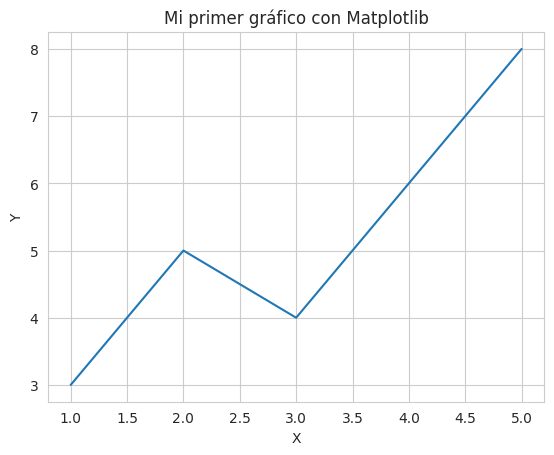

In [6]:
# -------------------------
# 2) Primer gráfico con Matplotlib
# -------------------------
plt.figure()
plt.plot(df["x"], df["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Mi primer gráfico con Matplotlib")
plt.show()


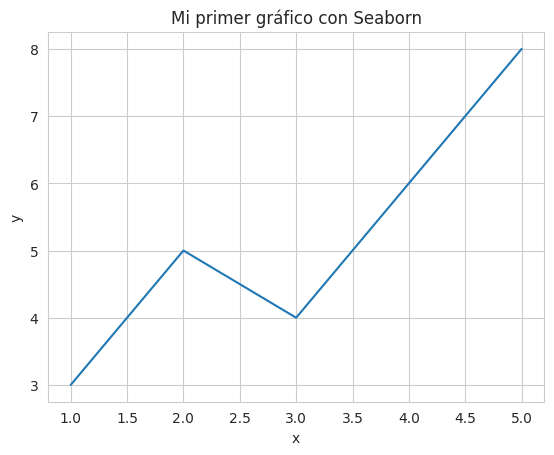

In [7]:
# -------------------------
# 3) El mismo gráfico con Seaborn
# -------------------------
sns.lineplot(data=df, x="x", y="y")
plt.title("Mi primer gráfico con Seaborn")
plt.show()


# Visualización de Datos COVID (Chile): Matplotlib + Seaborn (juntas)

**Objetivo didáctico:** trabajar el mismo análisis y las mismas figuras usando **Matplotlib** y **Seaborn** en paralelo, para:
- entender qué hace cada librería,
- ver equivalencias (misma figura, dos enfoques),
- escoger la herramienta más conveniente según el caso.

**Datasets (CSV):**
1. `datos-covid-por-region.csv` (series por región): columnas `Region`, `Fecha`, `Total`
2. `datos-covid-etareo.csv` (contagios por edad y sexo): columnas `Grupo de edad`, `Sexo`, `Fecha`, `Contagios`


## 1) Setup: librerías y configuración básica

En general:
- **Matplotlib** es la base (bajo nivel) → control fino.
- **Seaborn** es una capa “alto nivel” sobre Matplotlib → gráficos estadísticos con menos código.

> Nota: puedes usar ambas sin problema, porque Seaborn devuelve ejes (`Axes`) de Matplotlib.


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Calidad de figuras en notebook
plt.rcParams["figure.dpi"] = 120

# Estilo global (Seaborn ajusta Matplotlib)
sns.set_theme(style="whitegrid")

# Para ver todas las columnas en DataFrames
pd.set_option("display.max_columns", None)

## 2) Carga de datos

Usaremos rutas locales (montadas en el entorno).

In [10]:
path_region = "datos-covid-por-region.csv"
path_etareo = "datos-covid-etareo.csv"

df_region = pd.read_csv(path_region)
df_etareo = pd.read_csv(path_etareo)

print("df_region:", df_region.shape)
display(df_region.head())

print("\ndf_etareo:", df_etareo.shape)
display(df_etareo.head())

df_region: (4165, 3)


,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0



df_etareo: (3128, 4)


,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


## 3) Limpieza mínima y tipos

Punto clave para visualizaciones de series de tiempo: **`Fecha` debe ser datetime**.

In [11]:
# Copias para evitar sorpresas si re-ejecutas celdas
df_region = df_region.copy()
df_etareo = df_etareo.copy()

# Fecha → datetime
df_region["Fecha"] = pd.to_datetime(df_region["Fecha"], errors="coerce")
df_etareo["Fecha"] = pd.to_datetime(df_etareo["Fecha"], errors="coerce")

# Estandarización básica
df_region["Region"] = df_region["Region"].astype(str).str.strip()
df_etareo["Grupo de edad"] = df_etareo["Grupo de edad"].astype(str).str.strip()
df_etareo["Sexo"] = df_etareo["Sexo"].astype(str).str.strip().str.upper()

# Revisión rápida de nulos
print("Nulos df_region:\n", df_region.isna().sum(), sep="")
print("\nNulos df_etareo:\n", df_etareo.isna().sum(), sep="")

# Tipos
print("\nTipos df_region:\n", df_region.dtypes, sep="")
print("\nTipos df_etareo:\n", df_etareo.dtypes, sep="")

Nulos df_region:
Region    0
Fecha     0
Total     0
dtype: int64

Nulos df_etareo:
Grupo de edad    0
Sexo             0
Fecha            0
Contagios        0
dtype: int64

Tipos df_region:
Region               str
Fecha     datetime64[us]
Total            float64
dtype: object

Tipos df_etareo:
Grupo de edad               str
Sexo                        str
Fecha            datetime64[us]
Contagios                 int64
dtype: object


## 4) EDA rápido (tablas)

Antes de graficar: validar rangos, conteos y consistencia.

In [12]:
# Rango de fechas
print("Rango fechas (región):", df_region["Fecha"].min(), "→", df_region["Fecha"].max())
print("Rango fechas (etareo):", df_etareo["Fecha"].min(), "→", df_etareo["Fecha"].max())

# Nº regiones y top por total máximo (ojo: "Total" suele ser acumulado)
print("\nRegiones únicas:", df_region["Region"].nunique())
max_total_by_region = (df_region.groupby("Region")["Total"].max().sort_values(ascending=False))
display(max_total_by_region.head(10))

# Distribución sexo y grupos etarios
print("\nSexos:", df_etareo["Sexo"].unique())
print("Grupos de edad (n):", df_etareo["Grupo de edad"].nunique())
display(df_etareo["Grupo de edad"].value_counts().head(10))

Rango fechas (región): 2020-03-03 00:00:00 → 2020-11-02 00:00:00
Rango fechas (etareo): 2020-03-25 00:00:00 → 2020-11-13 00:00:00

Regiones únicas: 17


Region
Total            513188.0
Metropolitana    297423.0
Valparaíso        30498.0
Biobío            29931.0
Antofagasta       21447.0
Maule             19061.0
O’Higgins         18749.0
Los Lagos         15391.0
Tarapacá          12973.0
Araucanía         12726.0
Name: Total, dtype: float64


Sexos: <StringArray>
['M', 'F']
Length: 2, dtype: str
Grupos de edad (n): 17


Grupo de edad
00 - 04 años    184
05 - 09 años    184
10 - 14 años    184
15 - 19 años    184
20 - 24 años    184
25 - 29 años    184
30 - 34 años    184
35 - 39 años    184
40 - 44 años    184
45 - 49 años    184
Name: count, dtype: int64

# Parte A — Series por región (Matplotlib vs Seaborn)

## A1) Preparar serie: total y variación diaria

Muchas fuentes reportan `Total` como **acumulado**.  
Para analizar dinámica diaria, calculamos:

- `Total` (acumulado)
- `Nuevos` (diferencia día a día por región)

> Si `Total` NO fuera acumulado, `diff()` no tendría sentido. Por eso siempre validamos con un par de regiones.

In [13]:
df_reg = df_region.sort_values(["Region", "Fecha"]).copy()

# Nuevos casos estimados como diferencia del total acumulado por región
df_reg["Nuevos"] = df_reg.groupby("Region")["Total"].diff()

# A veces diff puede dar negativos si hay correcciones; los dejamos para discutir.
display(df_reg.head(10))

# Validación rápida en 1 región
una_region = df_reg["Region"].iloc[0]
display(df_reg[df_reg["Region"] == una_region].head(10))

,Region,Fecha,Total,Nuevos
2,Antofagasta,2020-03-03,0.0,NaN
19,Antofagasta,2020-03-04,0.0,0.0
36,Antofagasta,2020-03-05,0.0,0.0
53,Antofagasta,2020-03-06,0.0,0.0
70,Antofagasta,2020-03-07,0.0,0.0
87,Antofagasta,2020-03-08,0.0,0.0
104,Antofagasta,2020-03-09,0.0,0.0
121,Antofagasta,2020-03-10,0.0,0.0
138,Antofagasta,2020-03-11,0.0,0.0
155,Antofagasta,2020-03-12,0.0,0.0


,Region,Fecha,Total,Nuevos
2,Antofagasta,2020-03-03,0.0,NaN
19,Antofagasta,2020-03-04,0.0,0.0
36,Antofagasta,2020-03-05,0.0,0.0
53,Antofagasta,2020-03-06,0.0,0.0
70,Antofagasta,2020-03-07,0.0,0.0
87,Antofagasta,2020-03-08,0.0,0.0
104,Antofagasta,2020-03-09,0.0,0.0
121,Antofagasta,2020-03-10,0.0,0.0
138,Antofagasta,2020-03-11,0.0,0.0
155,Antofagasta,2020-03-12,0.0,0.0


## A2) Seleccionar regiones “top” para no saturar el gráfico

Graficar 16 regiones simultáneas suele ser ilegible.  
Tomaremos un TOP-N por `Total` máximo.

In [14]:
TOP_N = 6
top_regions = (df_reg.groupby("Region")["Total"].max()
               .sort_values(ascending=False)
               .head(TOP_N)
               .index.tolist())

df_top = df_reg[df_reg["Region"].isin(top_regions)].copy()
print("Top regiones:", top_regions)
display(df_top.head())

Top regiones: ['Total', 'Metropolitana', 'Valparaíso', 'Biobío', 'Antofagasta', 'Maule']


,Region,Fecha,Total,Nuevos
2,Antofagasta,2020-03-03,0.0,NaN
19,Antofagasta,2020-03-04,0.0,0.0
36,Antofagasta,2020-03-05,0.0,0.0
53,Antofagasta,2020-03-06,0.0,0.0
70,Antofagasta,2020-03-07,0.0,0.0


## A3) Mismo gráfico 1: `Total` acumulado en el tiempo

### Versión Matplotlib (más control)


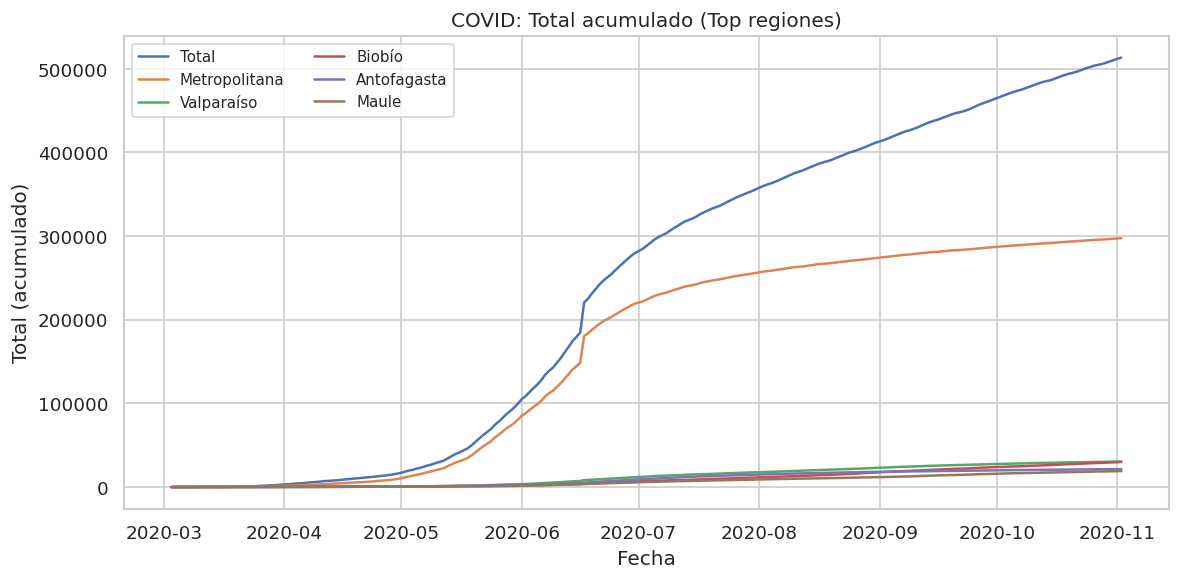

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

for reg in top_regions:
    sub = df_top[df_top["Region"] == reg]
    ax.plot(sub["Fecha"], sub["Total"], label=reg)

ax.set_title("COVID: Total acumulado (Top regiones)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Total (acumulado)")
ax.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

### Versión Seaborn (alto nivel)

Seaborn trabaja muy bien con data “long” (como `df_top`).

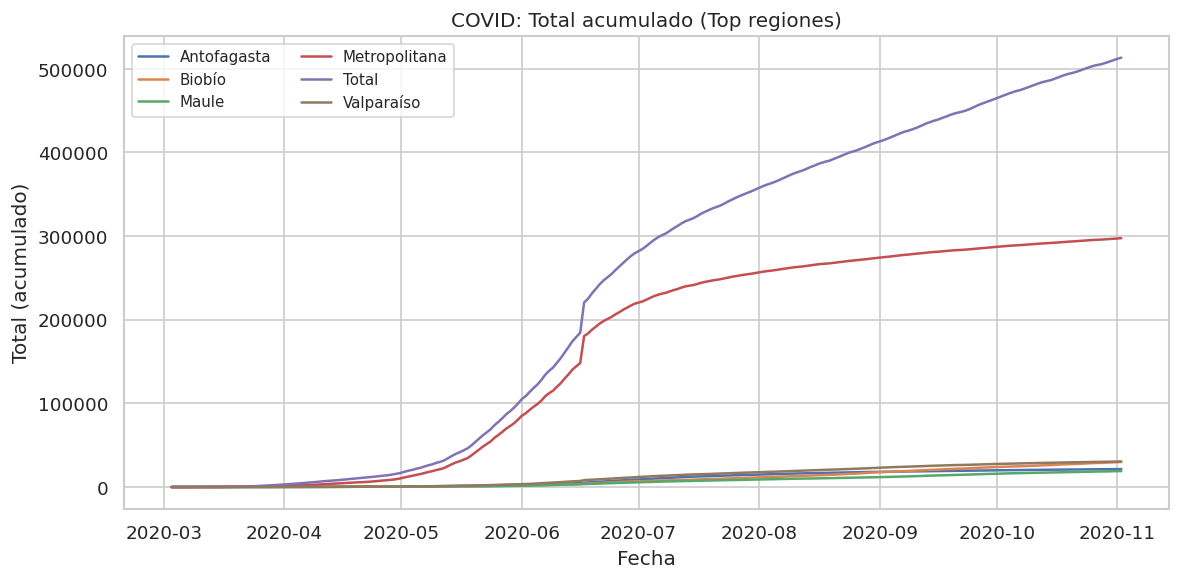

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_top,
    x="Fecha", y="Total",
    hue="Region"
)
plt.title("COVID: Total acumulado (Top regiones)")
plt.xlabel("Fecha")
plt.ylabel("Total (acumulado)")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

## A4) Mismo gráfico 2: `Nuevos` casos (aprox.) por día

Acá es típico usar:
- una línea suavizada (rolling)
- o una agregación semanal/mensual

Para mantenerlo simple: usaremos un **promedio móvil 7 días**.

In [17]:
df_top2 = df_top.copy()

# Promedio móvil 7 días de Nuevos
df_top2["Nuevos_ma7"] = (df_top2.groupby("Region")["Nuevos"]
                         .transform(lambda s: s.rolling(7, min_periods=1).mean()))

display(df_top2[["Region","Fecha","Nuevos","Nuevos_ma7"]].head(12))

,Region,Fecha,Nuevos,Nuevos_ma7
2,Antofagasta,2020-03-03,NaN,NaN
19,Antofagasta,2020-03-04,0.0,0.000000
36,Antofagasta,2020-03-05,0.0,0.000000
53,Antofagasta,2020-03-06,0.0,0.000000
70,Antofagasta,2020-03-07,0.0,0.000000
87,Antofagasta,2020-03-08,0.0,0.000000
104,Antofagasta,2020-03-09,0.0,0.000000
121,Antofagasta,2020-03-10,0.0,0.000000
138,Antofagasta,2020-03-11,0.0,0.000000
155,Antofagasta,2020-03-12,0.0,0.000000


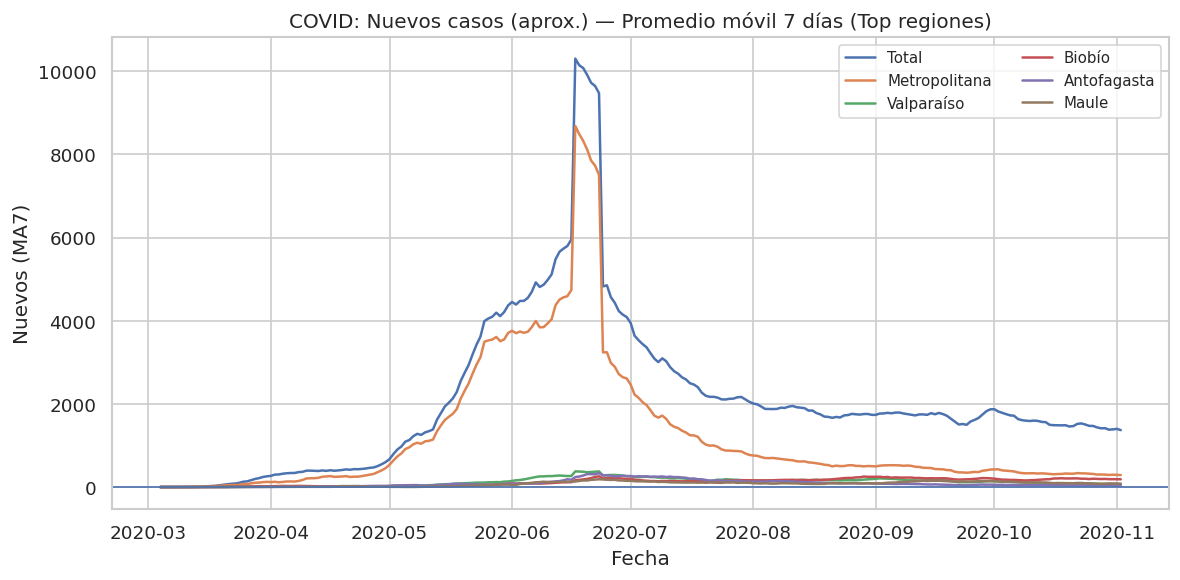

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

for reg in top_regions:
    sub = df_top2[df_top2["Region"] == reg]
    ax.plot(sub["Fecha"], sub["Nuevos_ma7"], label=reg)

ax.axhline(0, linewidth=1)  # referencia
ax.set_title("COVID: Nuevos casos (aprox.) — Promedio móvil 7 días (Top regiones)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nuevos (MA7)")
ax.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

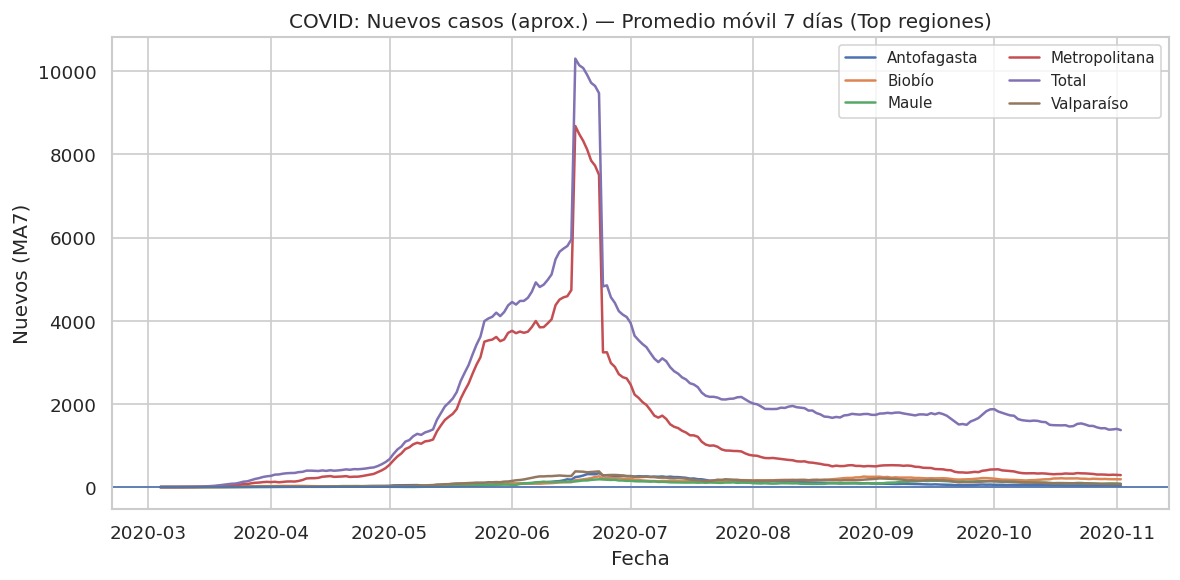

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_top2,
    x="Fecha", y="Nuevos_ma7",
    hue="Region"
)
plt.axhline(0, linewidth=1)
plt.title("COVID: Nuevos casos (aprox.) — Promedio móvil 7 días (Top regiones)")
plt.xlabel("Fecha")
plt.ylabel("Nuevos (MA7)")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

# Parte B — Contagios por edad y sexo (Matplotlib vs Seaborn)

## B1) Preparación: agregación por fecha, edad y sexo

Este dataset suele estar en formato “evento”/observación.  
Para comparar grupos, normalmente agregamos (sum/mean) por fecha.

In [20]:
# Agregar contagios por fecha, edad y sexo
df_e = (df_etareo
        .groupby(["Fecha", "Grupo de edad", "Sexo"], as_index=False)["Contagios"]
        .sum())

display(df_e.head())
print("Fechas únicas:", df_e["Fecha"].nunique())

,Fecha,Grupo de edad,Sexo,Contagios
0,2020-03-25,00 - 04 años,F,6
1,2020-03-25,00 - 04 años,M,4
2,2020-03-25,05 - 09 años,F,4
3,2020-03-25,05 - 09 años,M,2
4,2020-03-25,10 - 14 años,F,2


Fechas únicas: 92


## B2) Mismo gráfico 3: total del período por grupo etario (separado por sexo)

Primero agregamos todo el período (suma total).

In [21]:
df_tot = (df_e.groupby(["Grupo de edad", "Sexo"], as_index=False)["Contagios"]
          .sum())

# Orden razonable (alfabético por defecto; si quieres orden etario real, lo definimos manualmente)
display(df_tot.sort_values("Contagios", ascending=False).head(10))

,Grupo de edad,Sexo,Contagios
13,30 - 34 años,M,1248461
11,25 - 29 años,M,1229392
10,25 - 29 años,F,1211155
12,30 - 34 años,F,1133470
15,35 - 39 años,M,1026779
14,35 - 39 años,F,904574
17,40 - 44 años,M,865932
19,45 - 49 años,M,844595
21,50 - 54 años,M,802961
8,20 - 24 años,F,795259


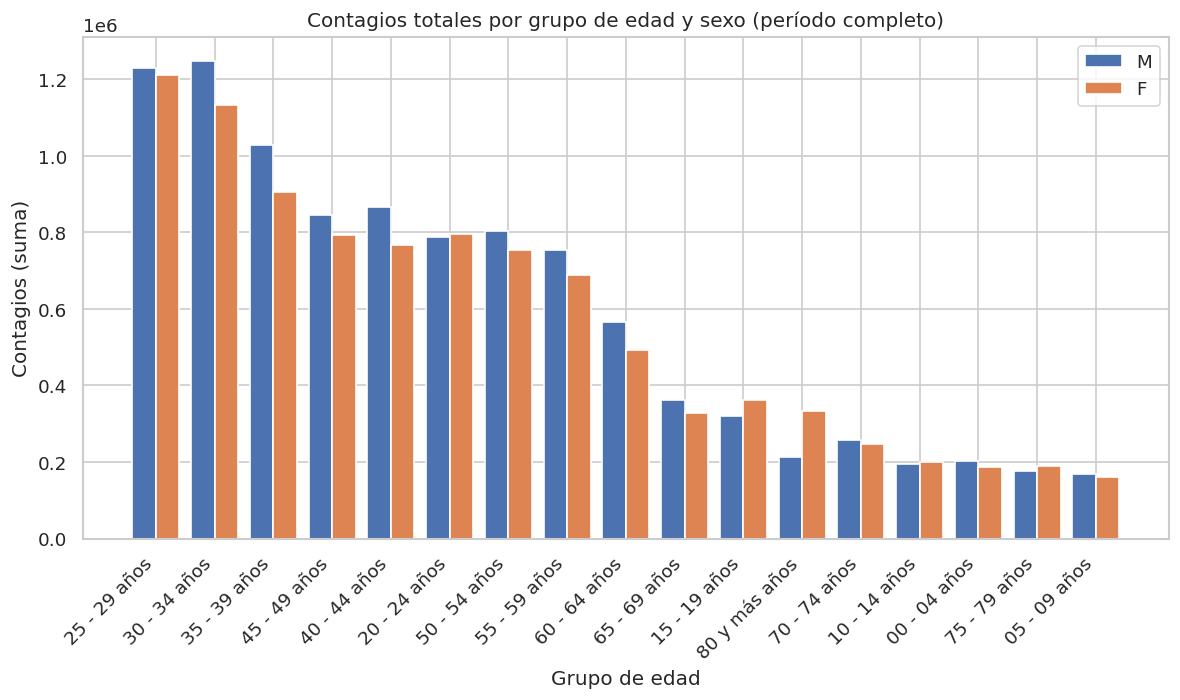

In [22]:
# Matplotlib: barras agrupadas requiere pivot o cálculo manual
pivot = df_tot.pivot(index="Grupo de edad", columns="Sexo", values="Contagios").fillna(0)

# (Opcional) ordenar por total
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

x = np.arange(len(pivot.index))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, pivot.get("M", pd.Series(0, index=pivot.index)), width, label="M")
ax.bar(x + width/2, pivot.get("F", pd.Series(0, index=pivot.index)), width, label="F")

ax.set_title("Contagios totales por grupo de edad y sexo (período completo)")
ax.set_xlabel("Grupo de edad")
ax.set_ylabel("Contagios (suma)")
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

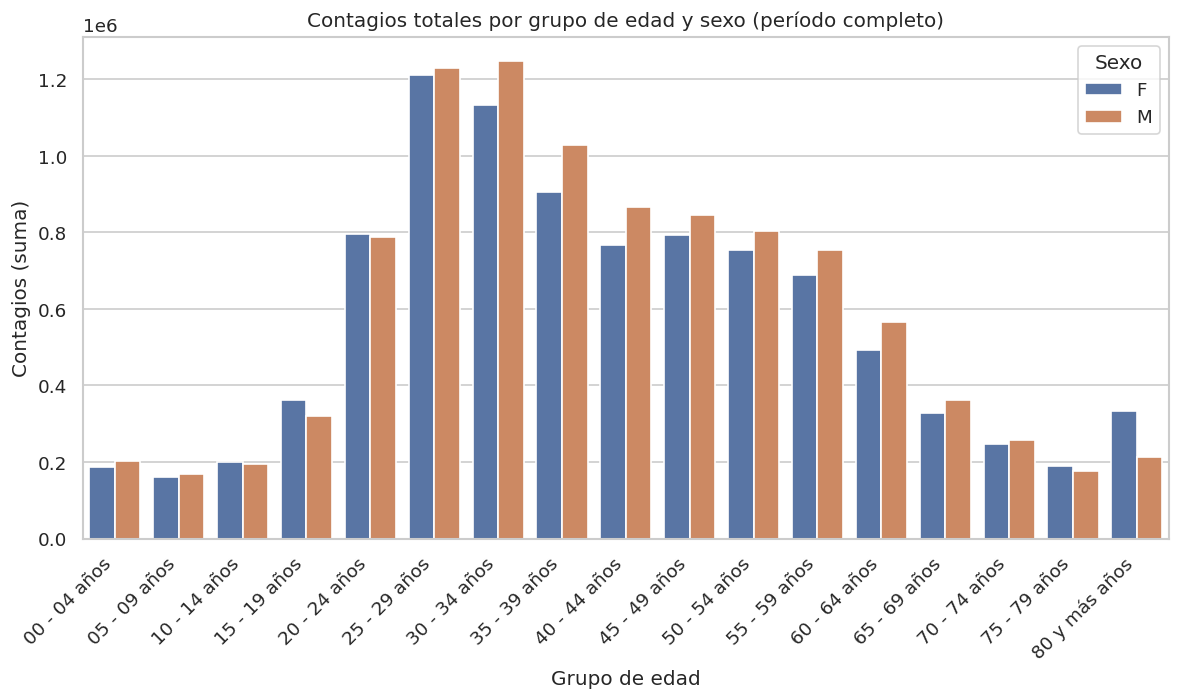

In [23]:
plt.figure(figsize=(10, 6))
# En seaborn, barras agrupadas salen directo con hue=
sns.barplot(
    data=df_tot,
    x="Grupo de edad", y="Contagios",
    hue="Sexo",
    estimator=sum,  # ya viene agregado, pero lo dejamos explícito
    errorbar=None
)
plt.title("Contagios totales por grupo de edad y sexo (período completo)")
plt.xlabel("Grupo de edad")
plt.ylabel("Contagios (suma)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## B3) Mismo gráfico 4: Heatmap (edad x fecha) para un sexo

Los heatmaps son muy útiles para:
- detectar picos por fecha,
- comparar patrones entre grupos etarios.

Vamos a construir un heatmap para un sexo (por ejemplo `F`).

In [24]:
sexo_obj = "F"  # cambia a "M" si quieres

df_h = df_e[df_e["Sexo"] == sexo_obj].copy()

# Tabla: filas = grupo etario, columnas = fecha
mat = df_h.pivot_table(
    index="Grupo de edad",
    columns="Fecha",
    values="Contagios",
    aggfunc="sum",
    fill_value=0
)

print("Matriz heatmap:", mat.shape)
display(mat.iloc[:5, :5])

Matriz heatmap: (17, 92)


Fecha,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
Grupo de edad,,,,,
00 - 04 años,6,7,7,9,10
05 - 09 años,4,5,5,6,9
10 - 14 años,2,3,4,6,6
15 - 19 años,12,14,16,17,20
20 - 24 años,43,50,54,60,66


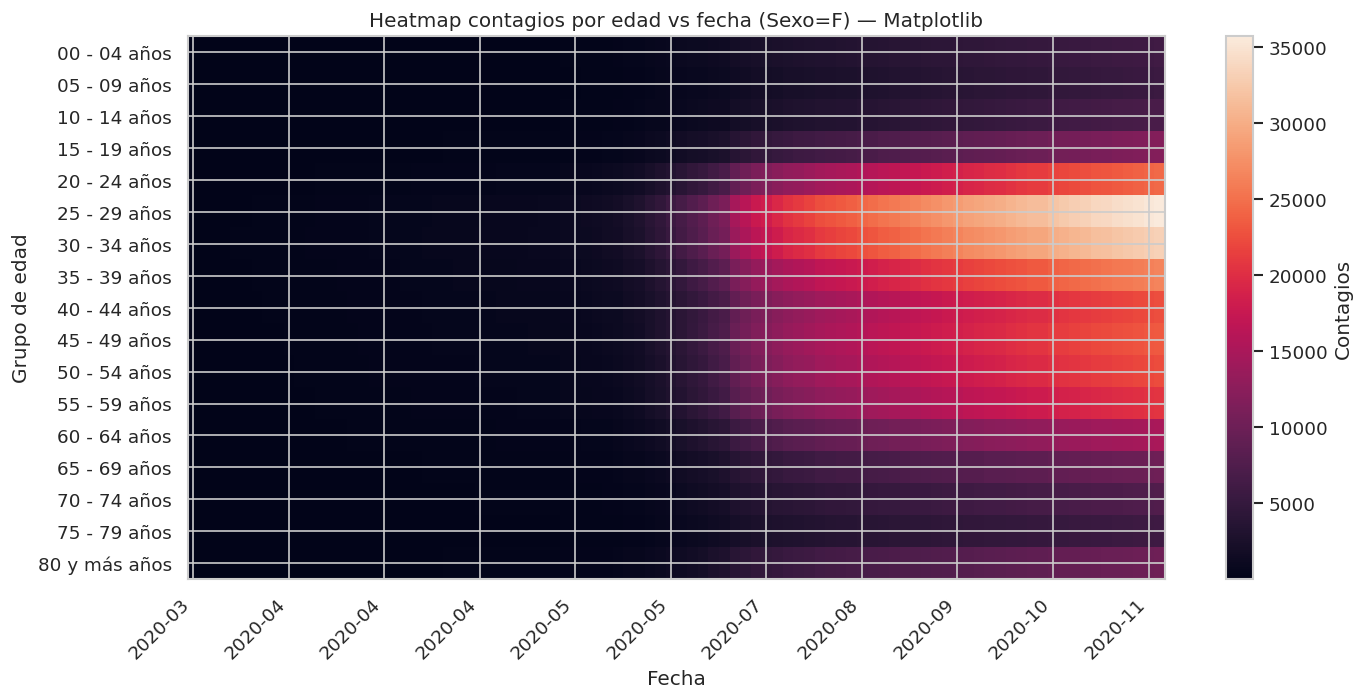

In [25]:
# Matplotlib puro: imshow
fig, ax = plt.subplots(figsize=(12, 6))

im = ax.imshow(mat.values, aspect="auto")

ax.set_title(f"Heatmap contagios por edad vs fecha (Sexo={sexo_obj}) — Matplotlib")
ax.set_xlabel("Fecha")
ax.set_ylabel("Grupo de edad")

# Etiquetas: para no saturar, muestreamos
xt = np.arange(0, mat.shape[1], max(1, mat.shape[1]//10))
ax.set_xticks(xt)
ax.set_xticklabels([mat.columns[i].strftime("%Y-%m") for i in xt], rotation=45, ha="right")

yt = np.arange(mat.shape[0])
ax.set_yticks(yt)
ax.set_yticklabels(mat.index)

fig.colorbar(im, ax=ax, label="Contagios")
plt.tight_layout()
plt.show()

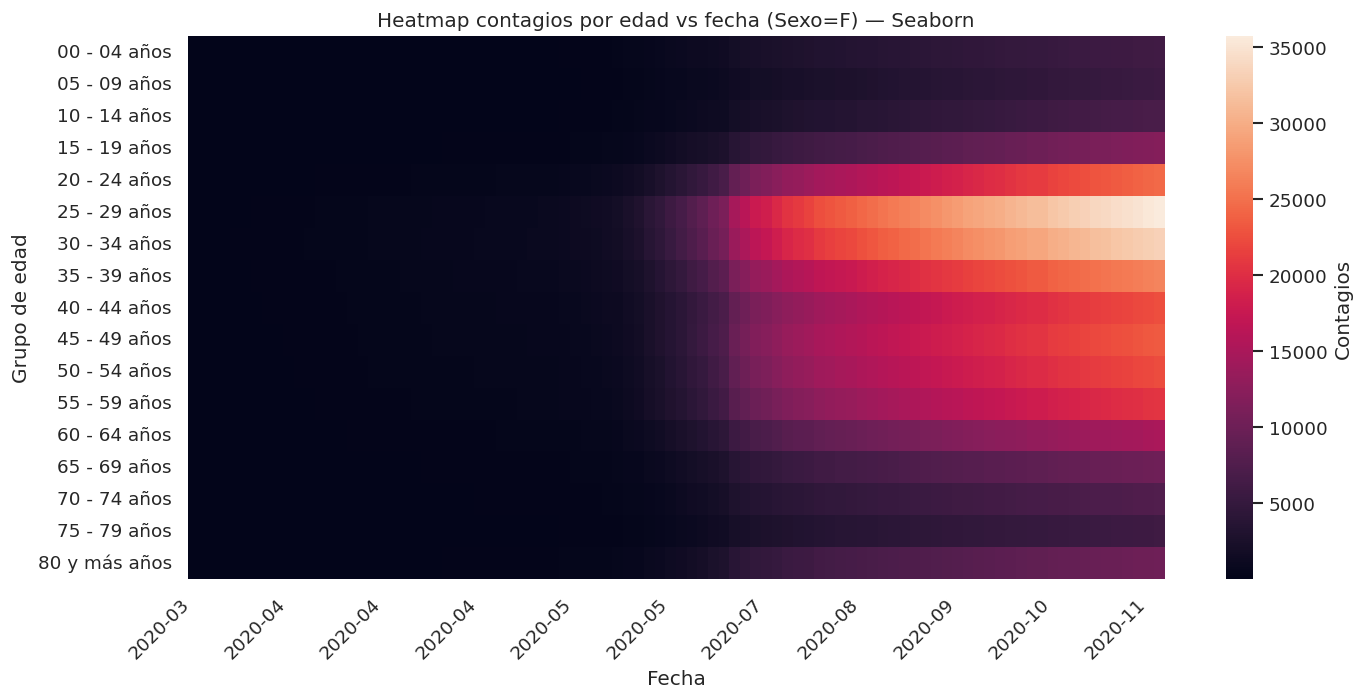

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(mat, cbar_kws={"label": "Contagios"})
plt.title(f"Heatmap contagios por edad vs fecha (Sexo={sexo_obj}) — Seaborn")
plt.xlabel("Fecha")
plt.ylabel("Grupo de edad")

# Para no saturar el eje x: muestreamos ticks
ax = plt.gca()
xt = np.arange(0, mat.shape[1], max(1, mat.shape[1]//10))
ax.set_xticks(xt + 0.5)  # centrado en celdas
ax.set_xticklabels([mat.columns[i].strftime('%Y-%m') for i in xt], rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Cierre: ¿cuándo usar cuál?

- Si necesitas **control fino** (subplots complejos, estilos ultra específicos): Matplotlib.
- Si quieres **rapidez y gráficos estadísticos** (boxplot, violinplot, hue/facets): Seaborn.

**Regla práctica:** empieza con Seaborn; si te quedas corto, “bajas” a Matplotlib.


## Mini-ejercicios (propuesto)

1. Cambia `TOP_N` y observa cómo cambia la legibilidad.
2. Cambia `sexo_obj` a `"M"` y compara el heatmap.
3. En el gráfico de `Nuevos_ma7`, prueba con ventana 14 días.
4. (Plus) Crea un `FacetGrid` en Seaborn para separar cada región en un panel.
